<a href="https://colab.research.google.com/github/DJerowd/Projeto_api/blob/main/TrabalhoADTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/TADS/Análise de Dados e Tomada de Decisões /download/test.csv')
train = pd.read_csv('/content/drive/MyDrive/TADS/Análise de Dados e Tomada de Decisões /download/train.csv')

In [ ]:
train

In [ ]:
train.describe()

In [ ]:
train.groupby('Sex')['Survived'].mean()

In [ ]:
train['Survived'].value_counts()

In [ ]:
train.groupby('Sex')['Survived'].value_counts()

In [ ]:
train.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
test

In [ ]:
test.describe()

Objetivo Seu trabalho é prever se um passageiro sobreviveu ou não ao naufrágio do Titanic:

Análise Exploratória e Visualização de Dados:

1. Explore a distribuição de características-chave, como idade, sexo, classe socioeconômica e taxa de sobrevivência.
2. Identifique padrões ou correlações entre as características e a sobrevivência dos passageiros.
3. Visualize esses padrões por meio de gráficos de barras, histogramas, gráficos de dispersão ou boxplots.
4. Investigue se existem diferenças na taxa de sobrevivência entre
grupos, como homens e mulheres, ou diferentes classes de passageiros.

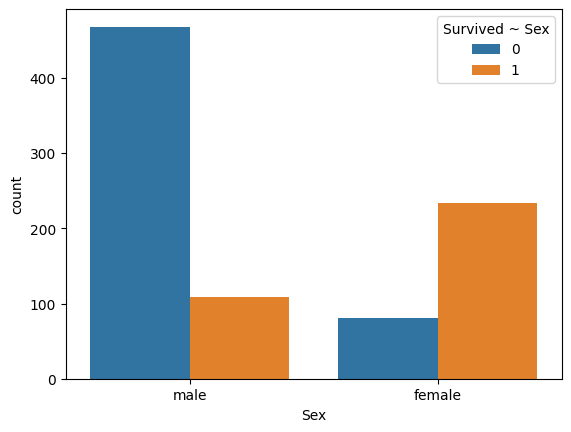

In [ ]:
sns.countplot(x = 'Sex', hue = "Survived", data = train)
plt.legend(loc = 'upper right', title ='Survived ~ Sex')

-Grande maioria dos homens não sobreviveu, cerca de aproximadamente 1/4 sobreviveu.

-Maioria das mulheres sobreviveu, aproximadamente 1/3 apenas não sobreviveu.

<Axes: xlabel='Sex', ylabel='Age'>

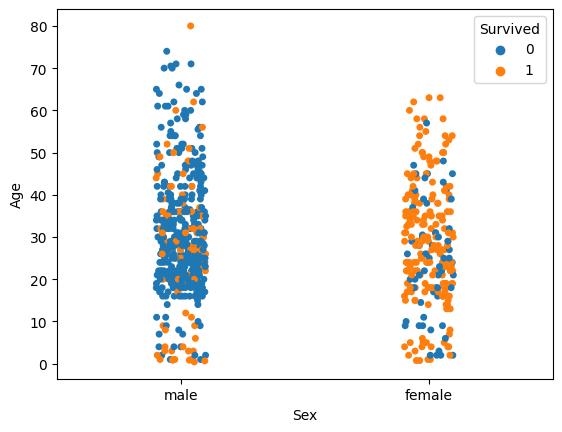

In [ ]:
sns.stripplot(x='Sex', y='Age', data=train, hue='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

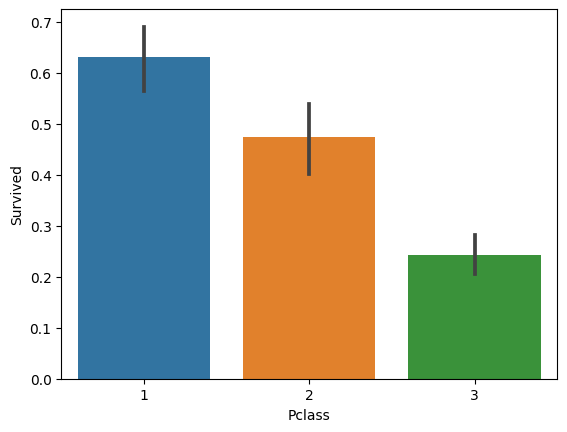

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=data)

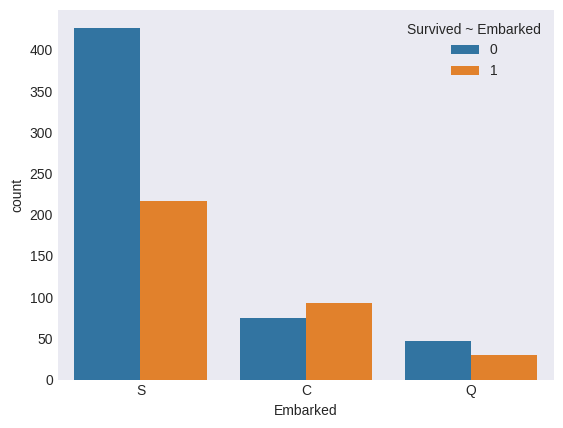

In [ ]:
sns.countplot(x ='Embarked', hue ='Survived', data =train)
plt.legend(loc = 'upper right', title = 'Survived ~ Embarked')

O lugar de embarque não deve afetar a probabilidade de sobrevivencia, já que não representa nenhum padrão consideravel.

In [ ]:
train.drop('Embarked', axis=1, inplace=True)

A passagem, cabine, nome e id do passageiro não representam um padrão que possa ser calculado a taxa de sobrevivencia.

In [ ]:
train.drop(['PassengerId','Name','Cabin','Ticket'],axis=1, inplace=True)

Restam apenas os dados da classe em que o passageiro viajava, taxa, sexo, idade, e se estava acompanhado para calcular a taxa de sobrevivencia.

In [ ]:
train

In [ ]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

<ipython-input-10-3bfc4dc87c00>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


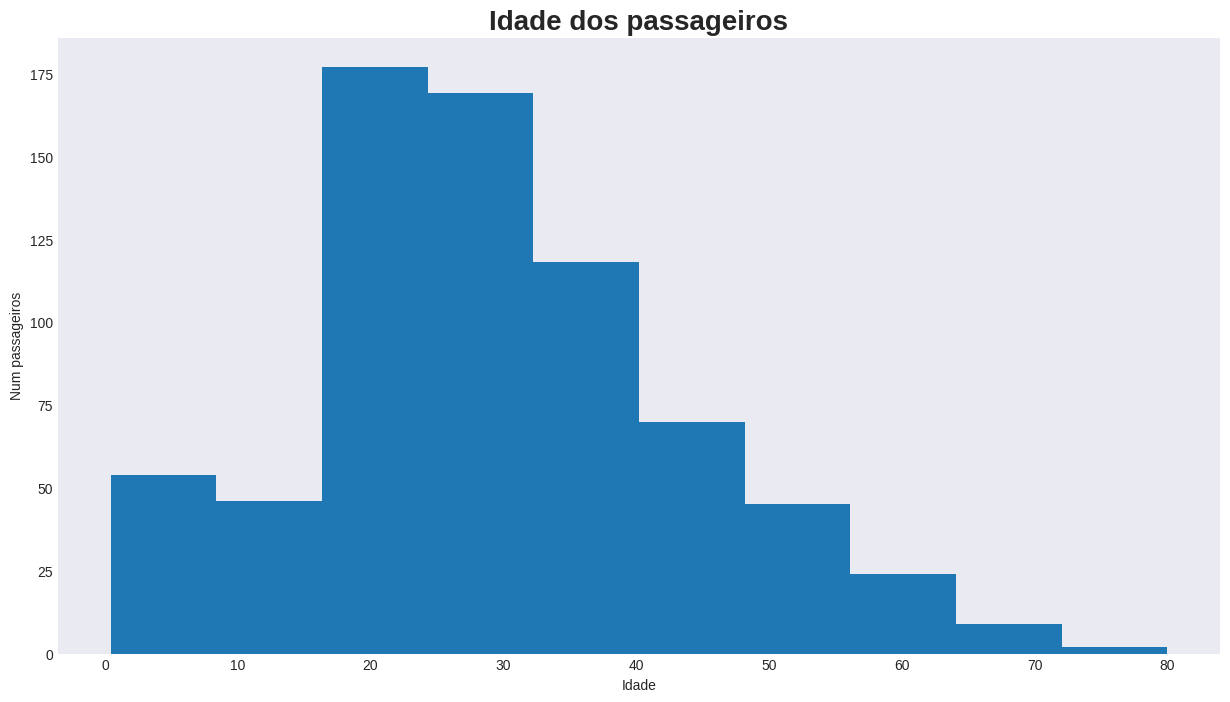

In [ ]:
plt.figure( figsize=(15, 8) )
plt.style.use('seaborn-dark')
plt.title('Idade dos passageiros', fontsize=20, fontweight='bold')
plt.hist(train.Age)
plt.xlabel('Idade')
plt.ylabel('Num passageiros')
plt.savefig('histograma_idade.png')

plt.show()

<ipython-input-81-62e90e2f8295>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


<Figure size 1800x1000 with 0 Axes>

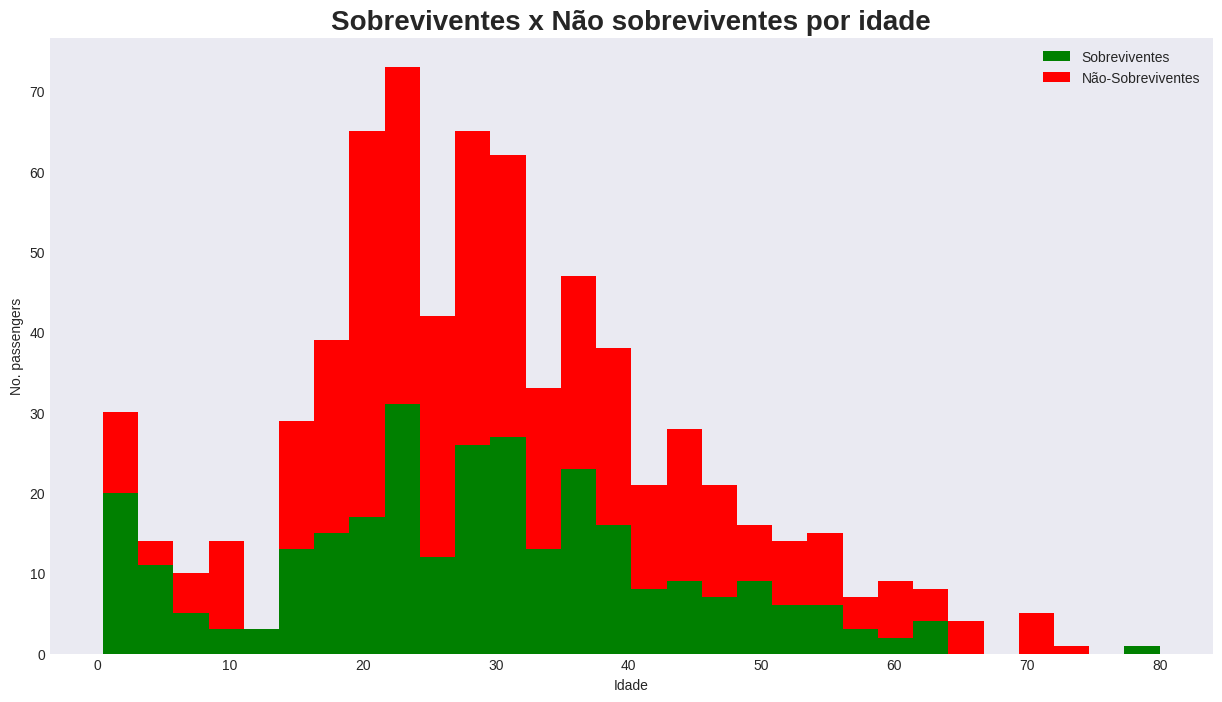

In [ ]:
plt.figure( figsize=(18, 10) )
plt.style.use('seaborn-dark')
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']],
         stacked=True, color=['g','r'],
         bins=30, label=['Sobreviventes','Não-Sobreviventes'])
plt.xlabel('Idade')
plt.ylabel('No. passengers')
plt.savefig('idade_sobreviventes.png')
plt.title('Sobreviventes x Não sobreviventes por idade', fontsize=20, fontweight='bold')
plt.legend();

In [ ]:
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '19-30', '31-50', '51+'])
probabilidade_por_idade = train.groupby('AgeGroup')['Survived'].mean()

In [ ]:
train['AgeGroup']

0      19-30
1      31-50
2      19-30
3      31-50
4      31-50
       ...  
886    19-30
887    19-30
888      NaN
889    19-30
890    31-50
Name: AgeGroup, Length: 891, dtype: category
Categories (4, object): ['0-18' < '19-30' < '31-50' < '51+']

<Axes: xlabel='AgeGroup', ylabel='Survived'>

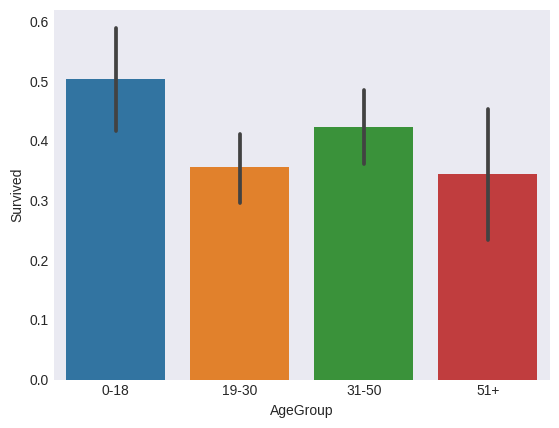

In [ ]:
sns.barplot(x='AgeGroup', y='Survived', data=train)

Divisão das idades em grupos para facilitar a interpretação.

<ipython-input-34-e7d4db4875eb>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your 

<Figure size 2000x800 with 0 Axes>

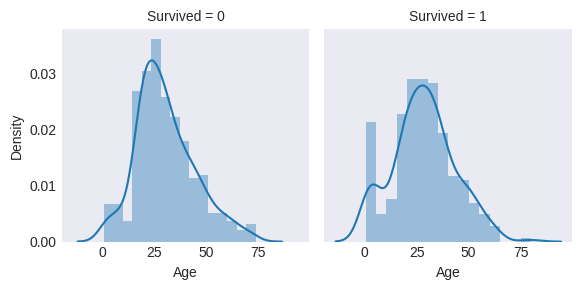

In [ ]:
plt.figure( figsize=(20, 8) )
plt.style.use('seaborn-dark')
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

Dados nulos precisam ser preenchidos de forma que não afete negativamente.

In [ ]:
train['Age'].fillna(train['Age'].median(skipna=True), inplace=True)

Medidas de Tendência Central e Medidas de Dispersão:

1. Calcule a média de idades dos passageiros e identifique possíveis diferenças entre os grupos de sobreviventes e não sobreviventes.
2. Determine a variação da tarifa paga pelos passageiros e compare-a entre grupos.
3. Calcule a porcentagem de sobreviventes em cada classe socioeconômica e explore as diferenças entre elas.

In [ ]:
sobreviventes = train.loc[train['Survived'] == 1]
mortos = train.loc[train['Survived'] == 0]

print("Quantidade de sobreviventes:", sobreviventes['Sex'].count())
print("Quantidade de não sobreviventes:", mortos['Sex'].count())

Quantidade de sobreviventes: 342
Quantidade de não sobreviventes: 549


In [ ]:
media_idades = train['Age'].mean()

media_sobreviventes = train[train['Survived'] == 1]['Age'].mean()
media_nao_sobreviventes = train[train['Survived'] == 0]['Age'].mean()

print("Média de idades dos passageiros:", media_idades)
print("Média de idades dos sobreviventes:", media_sobreviventes)
print("Média de idades dos não sobreviventes:", media_nao_sobreviventes)

Média de idades dos passageiros: 29.69911764705882
Média de idades dos sobreviventes: 28.343689655172415
Média de idades dos não sobreviventes: 30.62617924528302


Aparentemente passageiros mais novos são a maioria entre os sobreviventes, já os mais velhos maioria entre vitimas.

In [ ]:
variacao_tarifa = np.var(train['Fare'])

variacao_tarifa_sobreviventes = np.var(train[train['Survived'] == 1]['Fare'])
variacao_tarifa_naosobreviventes = np.var(train[train['Survived'] == 0]['Fare'])

print("Variação da tarifa paga pelos passageiros:", variacao_tarifa)
print("Variação da tarifa paga pelos sobreviventes:", variacao_tarifa_sobreviventes)
print("Variação da tarifa paga pelos não sobreviventes:", variacao_tarifa_naosobreviventes)

Variação da tarifa paga pelos passageiros: 2466.665311685043
Variação da tarifa paga pelos sobreviventes: 4422.1918538115215
Variação da tarifa paga pelos não sobreviventes: 983.4249381503198


In [ ]:
sobreviventes_por_classe = sobreviventes['Pclass'].value_counts(normalize=True)
print("Sobreviventes da 1ª classe:", sobreviventes_por_classe[1]," %")
print("Sobreviventes da 2ª classe:", sobreviventes_por_classe[2]," %")
print("Sobreviventes da 3ª classe:", sobreviventes_por_classe[3]," %")
print()
não_sobreviventes_por_classe = mortos['Pclass'].value_counts(normalize=True)
print("Não sobreviventes da 1ª classe:", não_sobreviventes_por_classe[1]," %")
print("Não sobreviventes da 2ª classe:", não_sobreviventes_por_classe[2]," %")
print("Não sobreviventes da 3ª classe:", não_sobreviventes_por_classe[3]," %")

Sobreviventes da 1ª classe: 0.39766081871345027  %
Sobreviventes da 2ª classe: 0.2543859649122807  %
Sobreviventes da 3ª classe: 0.347953216374269  %

Não sobreviventes da 1ª classe: 0.14571948998178508  %
Não sobreviventes da 2ª classe: 0.1766848816029144  %
Não sobreviventes da 3ª classe: 0.6775956284153005  %


Como as classes mais altas são minoria entre os passageiros, e as mais baixas são a maioria entre os não sobreviventes, o percentual entre os sobreviventes se assemelha, mas entre os mortos é disparadamente maior.

In [ ]:
sobreviventes_por_sexo = sobreviventes['Sex'].value_counts(normalize=True)
print("Sobreviventes do sexo Feminino: ", sobreviventes_por_sexo['female']," %")
print("Sobreviventes do sexo Masculino:", sobreviventes_por_sexo['male']," %")
print()
não_sobreviventes_por_sexo = mortos['Sex'].value_counts(normalize=True)
print("Não sobreviventes do sexo Feminino: ", não_sobreviventes_por_sexo['female']," %")
print("Não sobreviventes do sexo Masculino:", não_sobreviventes_por_sexo['male']," %")

Sobreviventes do sexo Feminino:  0.6812865497076024  %
Sobreviventes do sexo Masculino: 0.31871345029239767  %

Não sobreviventes do sexo Feminino:  0.14754098360655737  %
Não sobreviventes do sexo Masculino: 0.8524590163934426  %


A maioria entre os sobreviventes é do sexo feminino, pois foram prioridade no salvamento, já entre os não sobreviventes a grande maioria é do sexo masculino pois eram maioria entre os passageiros e também por serem os ultimos na prioridade da evacuação.

In [ ]:
passageiros_por_idade = pd.cut(train['Age'], bins=[0, 18, 30, 50, 100]).value_counts(normalize=True)
print("Passageiros de 0 à 18 anos:  ", passageiros_por_idade[1]," %")
print("Passageiros de 19 à 30 anos: ", passageiros_por_idade[19]," %")
print("Passageiros de 31 à 50 anos: ", passageiros_por_idade[31]," %")
print("Passageiros de 51 à 100 anos:", passageiros_por_idade[51]," %")
print()
sobreviventes_por_idade = pd.cut(sobreviventes['Age'], bins=[0, 18, 30, 50, 100]).value_counts(normalize=True)
print("Sobreviventes de 0 à 18 anos:  ", sobreviventes_por_idade[1]," %")
print("Sobreviventes de 19 à 30 anos: ", sobreviventes_por_idade[19]," %")
print("Sobreviventes de 31 à 50 anos: ", sobreviventes_por_idade[31]," %")
print("Sobreviventes de 51 à 100 anos:", sobreviventes_por_idade[51]," %")
print()
não_sobreviventes_por_idade = pd.cut(mortos['Age'], bins=[0, 18, 30, 50, 100]).value_counts(normalize=True)
print("Não sobreviventes de 0 à 18 anos:  ", não_sobreviventes_por_idade[1]," %")
print("Não sobreviventes de 19 à 30 anos: ", não_sobreviventes_por_idade[19]," %")
print("Não sobreviventes de 31 à 50 anos: ", não_sobreviventes_por_idade[31]," %")
print("Não sobreviventes de 51 à 100 anos:", não_sobreviventes_por_idade[51]," %")

Passageiros de 0 à 18 anos:   0.19467787114845939  %
Passageiros de 19 à 30 anos:  0.37815126050420167  %
Passageiros de 31 à 50 anos:  0.33753501400560226  %
Passageiros de 51 à 100 anos: 0.0896358543417367  %

Sobreviventes de 0 à 18 anos:   0.2413793103448276  %
Sobreviventes de 19 à 30 anos:  0.3310344827586207  %
Sobreviventes de 31 à 50 anos:  0.35172413793103446  %
Sobreviventes de 51 à 100 anos: 0.07586206896551724  %

Não sobreviventes de 0 à 18 anos:   0.16273584905660377  %
Não sobreviventes de 19 à 30 anos:  0.41037735849056606  %
Não sobreviventes de 31 à 50 anos:  0.3278301886792453  %
Não sobreviventes de 51 à 100 anos: 0.09905660377358491  %


In [ ]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,AgeGroup
0,0,3,0,22.0,1,0,7.2500,19-30
1,1,1,1,38.0,1,0,71.2833,31-50
2,1,3,1,26.0,0,0,7.9250,19-30
3,1,1,1,35.0,1,0,53.1000,31-50
4,0,3,0,35.0,0,0,8.0500,31-50
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,19-30
887,1,1,1,19.0,0,0,30.0000,19-30
888,0,3,1,28.0,1,2,23.4500,NaN
889,1,1,0,26.0,0,0,30.0000,19-30


In [ ]:
train.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [ ]:
test.drop(['PassengerId', 'Name', 'Fare', 'Ticket', 'Cabin', 'Ticket', 'Embarked'],axis=1, inplace=True)

In [ ]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
dtype: int64

In [ ]:
test['Age'].fillna(train['Age'].median(skipna=True), inplace=True)

In [ ]:
test.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [ ]:
test

,Pclass,Sex,Age,SibSp,Parch
0,3,0,34.5,0,0
1,3,1,47.0,1,0
2,2,0,62.0,0,0
3,3,0,27.0,0,0
4,3,1,22.0,1,1
...,...,...,...,...,...
413,3,0,28.0,0,0
414,1,1,39.0,0,0
415,3,0,38.5,0,0
416,3,0,28.0,0,0


In [ ]:
test_dummies = train[['Pclass', 'Sex', 'Age', 'Fare']]
test_dummies = pd.get_dummies(test_dummies)

In [ ]:
test_dummies

In [ ]:
train_dummies = train[['Pclass', 'Sex', 'Age', 'Fare']]
train_dummies = pd.get_dummies(train_dummies)

In [ ]:
train_dummies

In [ ]:
train_survived = train['Survived']
train_survived = pd.get_dummies(train_survived)

In [ ]:
train_survived

Crianças e adultos foram maioria entre os sobreviventes pois representavam a maioria das mulheres e crianças que foram prioridades, jovem adultos e idosos eram a maioria entre homens e tripulantes, por isso são maioria entre os mortos.

Regressão Linear:

1. Aplique regressão linear para prever a taxa de sobrevivência com base em características relevantes.
2. Avalie a importância de cada variável independente no modelo de regressão linear.
3. Analise a qualidade do ajuste do modelo e interprete os coeficientes resultantes.

In [ ]:
regressor = LinearRegression()
regressor.fit(train_dummies, train_survived)
predictions = regressor.predict(test_dummies)

In [ ]:
predictions

array([[0.88381433, 0.11618567],
       [0.09357092, 0.90642908],
       [0.40521616, 0.59478384],
       ...,
       [0.41394145, 0.58605855],
       [0.53559376, 0.46440624],
       [0.93344873, 0.06655127]])

In [ ]:
g_X = train_survived.values
g_y = train_dummies.values

In [ ]:
train_g_X, test_g_X, train_g_y, test_g_y =  train_test_split(
    g_X, g_y, test_size=0.2, random_state=42
)

In [ ]:
modelo_titanic = LinearRegression()

In [ ]:
modelo_titanic.fit(train_g_X,train_g_y)

LinearRegression()

In [ ]:
titanic_predict = modelo_titanic.predict(test_g_X)

In [ ]:
plt.scatter(test_g_X, test_g_y)
plt.xlabel('Survived')
plt.ylabel('Total')
plt.plot(test_g_X, titanic_predict, color='red')

1. Implemente algoritmos de classificação, como árvores de decisão e radom forest, para prever a sobrevivência dos passageiros.
2. Realize a validação cruzada para avaliar o desempenho do modelo e ajustar os hiperparâmetros adequados.
3. Compare diferentes algoritmos e técnicas de machine learning em termos de precisão, recall ou outras métricas relevantes.

  * Faça suas considerações finais, destacando as inferências que puderam ser feitas com a análise.
  * Crie um dataframe com 2 colunas (Passageiro e Sobreviveu), para cada passageiro no conjunto de testes, você deve prever um valor 0 ou 1 (0 - morreu, 1 - sobreviveu).
  * Faça seus próprios comentários em cada item.
  * Tenha atenção a apresentação.
  * Publique seu trabalho no GitHub (atenção, a publicação deve estar com os gráficos e tabelas abertos, os seja, devem ficar visíveis no GitHub)

In [ ]:
X = train_dummies
y = train_survived

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
    )

In [ ]:
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = arvore.predict(X_test)

In [ ]:
floresta = RandomForestClassifier()
floresta.fit(X_train, y_train)

NameError: ignored

In [ ]:
y_predict = floresta.predict(X_test)
accuracy_score(y_test, y_predict)

NameError: ignored